In [2]:
import json
import os
import numpy as np
import itertools

from transformers import PreTrainedTokenizerFast, AutoTokenizer, AutoConfig
from transformers import XLMRobertaTokenizerFast
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from notebook_utils import *

# Load the results for down-stream NER + POS (cross-lingual transfer)

In [4]:
result_dir = "/home/limisiewicz/my-luster/entangled-in-scripts/models"

languages = ('ar', 'tr', 'zh','el', 'es', 'en')
alphas = (0.25, 0.5, 0.75, 1.0)
#alphas = (0.25, 1.0)

### Collect NER results

In [5]:
task = 'NER'
post_training = 'PROBE'
metric = 'f1-macro' if task == 'NER' else 'accuracy'




### Collect POS results

In [6]:
task = 'POS'
post_training = 'PROBE'
metric = 'f1-macro' if task == 'NER' else 'accuracy'

pos_results = {}

for lang_src in languages:
    pos_results[lang_src] = {}
    for lang_tgt in languages:
        pos_results[lang_src][lang_tgt] = []
        for alpha in alphas:

            result_file = f"{result_dir}/{task}_{post_training}/multilingual-tokenization/alpha-{alpha}_alpha-train-0.25_N-120000_1234/{lang_src}/{metric}_evaluation/{lang_tgt}/{metric}_all.txt"
            
            with open(result_file, 'r') as in_file:
                res = json.load(in_file)[f'eval_{metric}']
                
            pos_results[lang_src][lang_tgt].append(res)

# Plot in-lang results

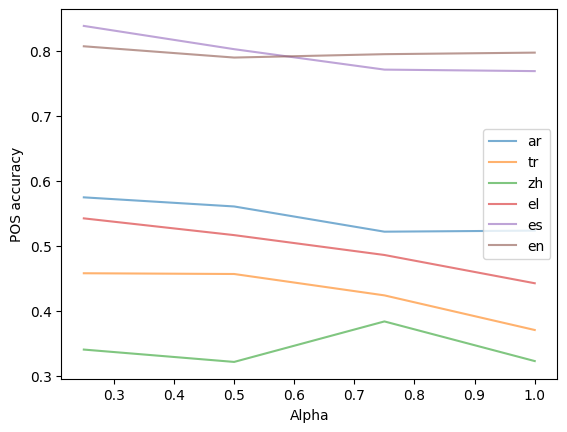

In [7]:
plt.figure()

for lang in languages:
    plt.plot(alphas, pos_results[lang][lang], label=lang, alpha=0.6)
    
plt.xlabel("Alpha")
plt.ylabel("POS accuracy")
plt.legend()

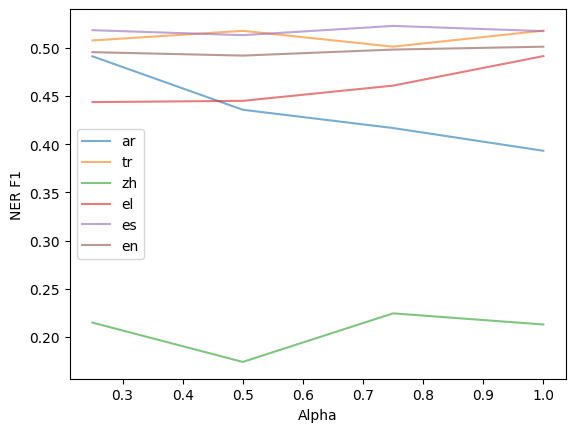

In [8]:
plt.figure()

for lang in languages:
    plt.plot(alphas, ner_results[lang][lang], label=lang, alpha=0.6)
    
plt.xlabel("Alpha")
plt.ylabel("NER F1")
plt.legend()

# Plot cross-lang (per each source)

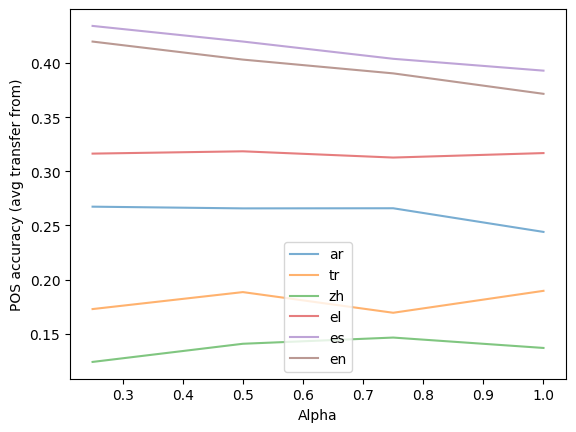

In [9]:
plt.figure()

for lang in languages:
    
    transfers_from = np.mean([pos_results[lang][tgt_lang] for tgt_lang in languages if lang != tgt_lang], axis=0)
    plt.plot(alphas, transfers_from, label=lang, alpha=0.6)
    
plt.xlabel("Alpha")
plt.ylabel("POS accuracy (avg transfer from)")
plt.legend()

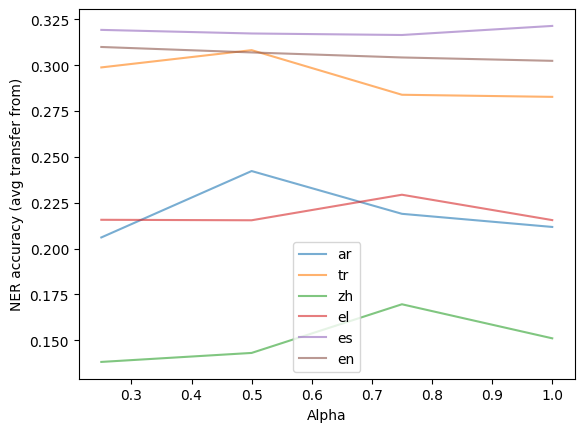

In [10]:
plt.figure()

for lang in languages:
    
    transfers_from = np.mean([ner_results[lang][tgt_lang] for tgt_lang in languages if lang != tgt_lang], axis=0)
    plt.plot(alphas, transfers_from, label=lang, alpha=0.6)
    
plt.xlabel("Alpha")
plt.ylabel("NER accuracy (avg transfer from)")
plt.legend()

# Plot cross-lang (per each target)

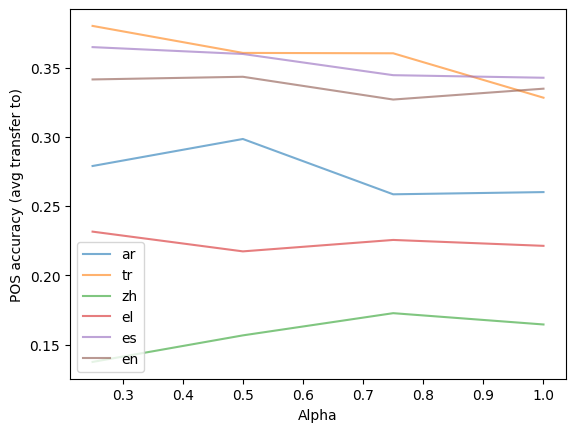

In [11]:
plt.figure()

for lang in languages:
    
    transfers_to = np.mean([pos_results[src_lang][lang] for src_lang in languages if lang != src_lang], axis=0)
    plt.plot(alphas, transfers_to, label=lang, alpha=0.6)
    
plt.xlabel("Alpha")
plt.ylabel("POS accuracy (avg transfer to)")
plt.legend()

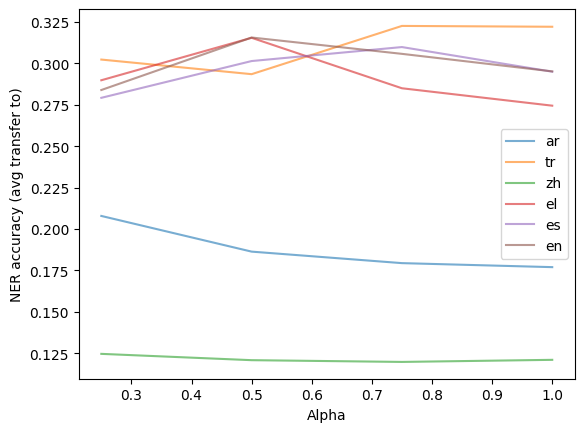

In [12]:
plt.figure()

for lang in languages:
    
    transfers_to = np.mean([ner_results[src_lang][lang] for src_lang in languages if lang != src_lang], axis=0)
    plt.plot(alphas, transfers_to, label=lang, alpha=0.6)
    
plt.xlabel("Alpha")
plt.ylabel("NER accuracy (avg transfer to)")
plt.legend()

## All Results

<Figure size 640x480 with 0 Axes>

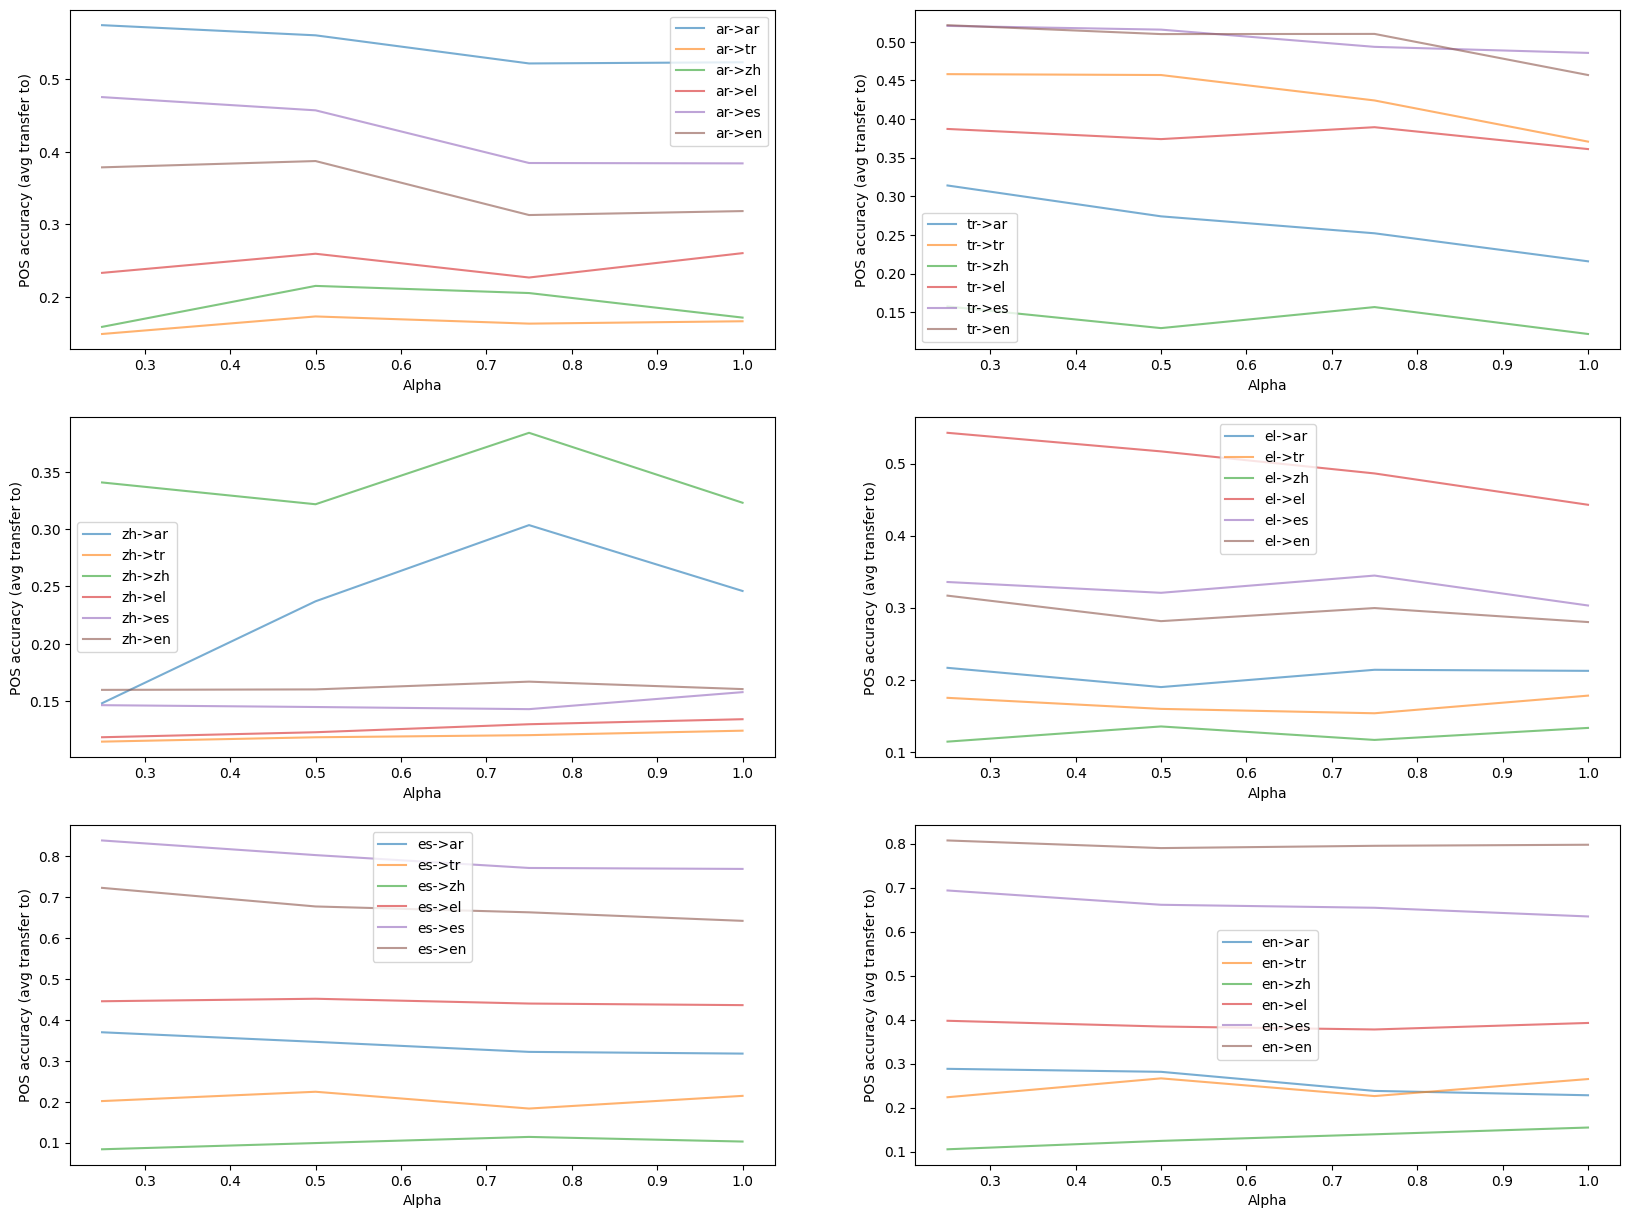

In [13]:
plt.figure()
fig, axs = plt.subplots(3, 2,figsize=(20, 15))
axs = axs.ravel()
for src_lang in languages:
    for ax_id, tgt_lang in enumerate(languages):
        #if src_lang != tgt_lang:
        transfers = pos_results[src_lang][tgt_lang]
        axs[ax_id].plot(alphas, transfers, label=f"{tgt_lang}->{src_lang}", alpha=0.6)

        axs[ax_id].set_xlabel("Alpha")
        axs[ax_id].set_ylabel("POS accuracy (avg transfer to)")
        axs[ax_id].legend()

<Figure size 640x480 with 0 Axes>

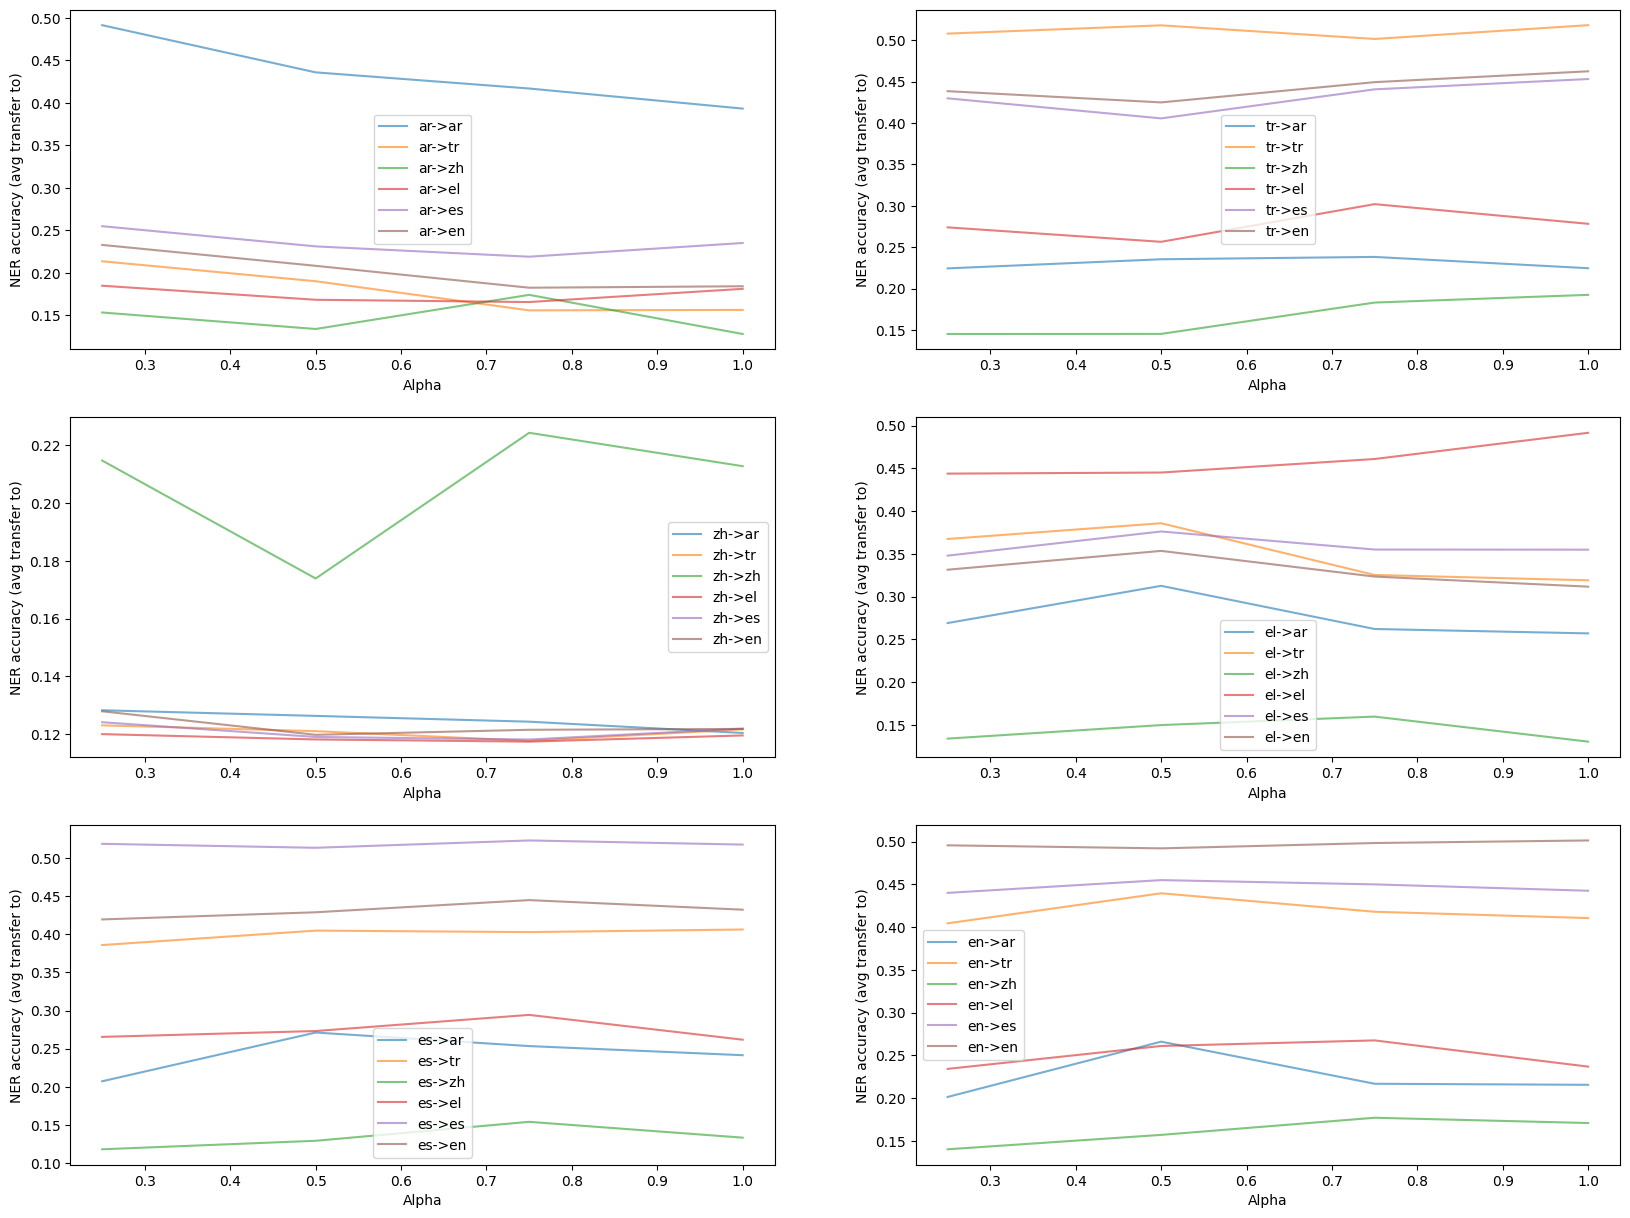

In [14]:
plt.figure()
fig, axs = plt.subplots(3, 2,figsize=(20, 15))
axs = axs.ravel()
for src_lang in languages:
    for ax_id, tgt_lang in enumerate(languages):
        #if src_lang != tgt_lang:
        transfers = ner_results[src_lang][tgt_lang]
        axs[ax_id].plot(alphas, transfers, label=f"{tgt_lang}->{src_lang}", alpha=0.6)

        axs[ax_id].set_xlabel("Alpha")
        axs[ax_id].set_ylabel("NER accuracy (avg transfer to)")
        axs[ax_id].legend()

**NER transfer increase with overlap for**